# Load libraries

In [1]:
library(docstring)     
library(ggplot2)
library(cowplot)
library(dplyr)        
library(tidyr)
library(org.Hs.eg.db)
library(data.table)    


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame

# Functions 

In [2]:
tpm_calculation <- function(count_g,len_g) {
    
    #' calculate tpms for two dependent counts #https://support.bioconductor.org/p/91218/
    #' 
    #' @description This function will calculate tpms for counts table
    #' derived from the same library.  
    #' 
    #' @param count_g data.frame. first counts
    #' 
    #' @param len_g list of integers. Transcript lengths corresponding to count_g
    #' 
    #'
    #' @usage tpm(count_g, len_g)
    #' @return Matix with tpms values for genes in data.frame
    #' @export

    
  g <- count_g/len_g

  tot_tpms <- colSums(g)
  
  tpm_g <- t(t(g)*1e6/tot_tpms)
 
    
  return(tpm_g)   
  
}

In [3]:
cv <- function(x){
    #' calculate coefficient of variation for set of values
    #' 
    #' @description This function will calculate coefficient of variation
    #' 
    #' @param x list of values
    #' 
    #' @usage cv(x)
    #' @return CV value
    #' @export
    
    sd(x, na.rm=TRUE)/mean(x, na.rm=TRUE)
}

In [4]:
gg_pca <- function(df,pc_a, pc_b,col_by,
                   palette, title, xlable,ylable, legendlab ){
    #' Generate PCA plot
    #' 
    #' @description This function will return PCA plot 
    #' 
    #' @param df data.frame with PC values
    #' @param pc_a string of PC to plot on the x axis
    #' @param pc_b string of PC to plot on the y axis
    #' @param col_by string representing how to group the colors
    #' @param palette string string of color palette to use
    #' @param title string of the plot title
    #' @param xlable string
    #' @param ylable string
    #' @param lagendlab string
    #' 
    #' @usage gg_pca(df,pc_a, pc_b,col_by,
    #'               palette, title, xlable,ylable, legendlab )
    #' @return PCA plot
    #' @export
    
    ggplot(df, aes(pc_a, pc_b, color=col_by)) +
    ylab(ylable) + xlab(xlable) + ggtitle(title) +
    geom_point(size=5) + theme_bw() +
    scale_color_brewer(name = legendlab,palette=palette)+
    theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_rect(colour = "black", size=0.75))+
    theme(plot.title = element_text(hjust = 0.5),
          title = element_text(size = 24, face = "bold"), 
          axis.title = element_text(size = 20,face = "bold"), 
          axis.text = element_text(size = 18))
    
}

# Load data

## Load in the metadata

In [5]:
metadata <- read.table("../data/metadata_all_samples.txt")
colnames(metadata) <- c("original_names","cellline","treatment","time","protocol","library")
metadata_hct116 <- subset(metadata, cellline=="HCT116")
metadata_hct116

,original_names,cellline,treatment,time,protocol,library
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Chi_DMSO_S9,HCT116,DMSO,1hr,PRO,LIG
2,Chi_Nutlin_S10,HCT116,NUTLIN,1hr,PRO,LIG
3,DMSO_1_S1_R1_001,HCT116,DMSO,1hr,PRO,TSRT
4,DMSO_2_S2_R1_001,HCT116,DMSO,1hr,PRO,TSRT
5,DMSO_HCT116_RPI_26_S1_R1_001,HCT116,DMSO,1hr,PRO,LIG
6,GRO15_DMSO_062111_042215,HCT116,DMSO,1hr,GRO,RPR
7,GRO18_DMSO10_062111_042215,HCT116,DMSO,1hr,GRO,RPR
8,GRO20_DMSO100_062111_042215,HCT116,DMSO,1hr,GRO,RPR
9,i13_AGTCAA_L008_R1_001,HCT116,DMSO,1hr,GRO,LIG


## Load in the counts


In [6]:
merged_counts <- read.table("../data/gene_counts.tsv",
                           header=TRUE)
head(merged_counts)
dim(merged_counts)

,Geneid,Chr,Start,End,Strand,Length,Chi_DMSO_S9,Chi_Nutlin_S10,DMSO_HCT116_RPI_26_S1_R1_001,DMSO_1_S1_R1_001,⋯,SRR579301,SRR579309,SRR653421,SRR653422,SRR817000,SRR828696,SRR8429046,SRR8429047,SRR8429054,SRR8429055
,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NR_075077,chr1,67092175,67134971,-,42797,4,1,11,12,⋯,0,0,0,0,0,6,2,0,0,0
2,NM_000299,chr1,201283451,201332993,+,49543,29,30,16,25,⋯,5,26,191,209,496,211,235,186,247,136
3,NM_001276352,chr1,67092175,67134971,-,42797,4,1,11,12,⋯,0,0,0,0,0,6,2,0,0,0
4,NM_001276351,chr1,67092175,67134971,-,42797,4,1,11,12,⋯,0,0,0,0,0,6,2,0,0,0
5,NM_001005337,chr1,201283451,201332993,+,49543,29,30,16,25,⋯,5,26,191,209,496,211,235,186,247,136
6,NR_038261,chr1,41847188,42035925,-,188738,1023,1507,2931,1759,⋯,58,114,459,694,1035,5644,3492,3424,1568,2413


[1] 74732    61

## Filter longest isoforms 

### Get gene names for the refseq IDs

In [7]:
##Check the database
columns(org.Hs.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"       "UNIGENE"     
[26] "UNIPROT"

In [8]:
##get refseq ids 
refseq_iso <- merged_counts$Geneid

In [9]:
#get gene names for the all RefSeq IDs
cols <- c("SYMBOL", "GENENAME")

ref_gn <- select(org.Hs.eg.db, 
                 keys=as.character(refseq_iso), 
                 columns=cols, keytype="REFSEQ")

#rename first column
colnames(ref_gn)[c(1)] <- c('Geneid')
dim(ref_gn)
head(ref_gn, 3)

'select()' returned many:1 mapping between keys and columns



[1] 74732     3

,Geneid,SYMBOL,GENENAME
,<chr>,<chr>,<chr>
1,NR_075077,C1orf141,chromosome 1 open reading frame 141
2,NM_000299,PKP1,plakophilin 1
3,NM_001276352,C1orf141,chromosome 1 open reading frame 141


In [10]:
##confirm check how many annotated transcripts 
length(unique(ref_gn$SYMBOL)) ## actually 27971 (with 1 'NA')

[1] 27972

In [11]:
##merge the gene annotations to the counts table
merged_counts_gene <- left_join(merged_counts,
                                ref_gn, by = "Geneid",
                                keep=TRUE) 

##save all the unique counts with annotations to a separate variable
merged_counts_gene_unique <- unique(merged_counts_gene)

##filter out all transcripts not annotated (those would have NA in the SYMBOL column)
counts_anno <- merged_counts_gene_unique[!is.na(merged_counts_gene_unique$SYMBOL),][c(63,64,2:61)]

##get transcripts without annotations
counts_no_anno <- merged_counts_gene_unique[is.na(merged_counts_gene_unique$SYMBOL),]

##keep unique genes
counts_no_anno_uniq <-unique(counts_no_anno[c(63,64,2:61)])

##add columns with Gene name and symbol
counts_no_anno_uniq$SYMBOL <- merged_counts[as.numeric(rownames(counts_no_anno_uniq)),]$Geneid
counts_no_anno_uniq$GENENAME <- merged_counts[as.numeric(rownames(counts_no_anno_uniq)),]$Geneid

##subset genes without gene names and symbols
##keep the RefSeq IDs for these genes
counts_no_anno_noNA <- counts_no_anno_uniq[!is.na(counts_no_anno_uniq$SYMBOL),]

### Get the transcript with the longest isoform 

Using `data.table` R package.

In [12]:
##for the trancripts counted, get longest isoform
new_counts <- as.data.frame(setDT(counts_anno)[order(-Length, SYMBOL), head(.SD, 1), by = SYMBOL])
rownames(new_counts) <- new_counts$SYMBOL
head(new_counts)
dim(new_counts)

,SYMBOL,GENENAME,Chr,Start,End,Strand,Length,Chi_DMSO_S9,Chi_Nutlin_S10,DMSO_HCT116_RPI_26_S1_R1_001,⋯,SRR579301,SRR579309,SRR653421,SRR653422,SRR817000,SRR828696,SRR8429046,SRR8429047,SRR8429054,SRR8429055
,<chr>,<chr>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CNTNAP2,CNTNAP2,contactin associated protein like 2,chr7,146116360,148420996,+,2304637,186,192,324,⋯,249,642,4315,8409,136,1174,345,400,233,242
PTPRD,PTPRD,protein tyrosine phosphatase receptor type D,chr9,8314245,10612723,-,2298479,23,28,113,⋯,2,6,37,47,36,683,24,31,14,62
DMD,DMD,dystrophin,chrX,31119227,33339609,-,2220383,24,20,1145,⋯,7,22,193,295,41,365,3033,2789,1906,3178
DLG2,DLG2,discs large MAGUK scaffold protein 2,chr11,83455012,85628337,-,2173326,311,570,1528,⋯,127,225,2388,4112,2547,2338,956,1132,458,1114
CSMD1,CSMD1,CUB and Sushi multiple domains 1,chr8,2935352,4994806,-,2059455,25,34,308,⋯,32,51,570,810,49,328,2,26,3,25
MACROD2,MACROD2,mono-ADP ribosylhydrolase 2,chr20,13995499,16053196,+,2057698,131,164,7930,⋯,77,160,1606,3252,7856,1334,7104,6955,4529,3713


[1] 27971    62

In [13]:
##get sample counts for HCT116 samples only
counts <- new_counts[colnames(new_counts) %in% metadata_hct116$original_names]
lengths <- new_counts[c(7)]
rownames(counts) <- new_counts$SYMBOL

## Calculate TPMs for the longest isoforms

In [14]:
tpms <- tpm_calculation(counts, new_counts$Length)

tpm_df_genes <- as.data.frame(tpms) 
head(tpm_df_genes)


,Chi_DMSO_S9,Chi_Nutlin_S10,DMSO_HCT116_RPI_26_S1_R1_001,DMSO_1_S1_R1_001,DMSO_2_S2_R1_001,GRO15_DMSO_062111_042215,GRO18_DMSO10_062111_042215,GRO20_DMSO100_062111_042215,i13_AGTCAA_L008_R1_001,i14_AGTTCC_L008_R1_001,⋯,Nuria_DMSO_S6,Nuria_Nutlin_S7,Nutlin_1_S3_R1_001,Nutlin_2_S4_R1_001,Sam_DMSO_S9_R1_001,SRR1105736,SRR1105737,SRR1105738,SRR1105739,SRR828696
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNTNAP2,0.079748447,0.068906554,0.04743110,0.017018294,0.014307267,0.3509294,0.03729396,5.131400,0.026431481,0.015652578,⋯,0.071634778,0.077897634,0.018382208,0.011888784,0.039376119,0.035523569,0.025584472,0.034505512,0.024945724,0.08341292
PTPRD,0.009887787,0.010075795,0.01658665,0.001583247,0.001593955,0.1790487,0.03017751,4.779587,0.007319682,0.009693670,⋯,0.007292051,0.006132316,0.003291332,0.001644226,0.009962650,0.011222344,0.012162699,0.014507055,0.009275307,0.04865729
DMD,0.010680588,0.007450131,0.17397961,0.004643646,0.003202977,0.2046867,0.02784339,2.683330,0.004441767,0.005017309,⋯,0.008303382,0.011025479,0.003504441,0.001787160,0.013750746,0.006566164,0.005807585,0.008500360,0.006552710,0.02691738
DLG2,0.141399324,0.216926103,0.23720248,0.086232640,0.072883671,0.2963886,0.16304563,4.885368,0.140943086,0.170376635,⋯,0.144599442,0.146093309,0.091695957,0.071730036,0.177557155,0.107505368,0.072286996,0.099928610,0.093073398,0.17615193
CSMD1,0.011994980,0.013654898,0.05045674,0.003632171,0.002616107,0.2467459,0.03441214,5.011103,0.004507154,0.005409367,⋯,0.013021406,0.008645107,0.002413902,0.001468046,0.009883496,0.008531405,0.006452583,0.006842891,0.004857013,0.02607890
MACROD2,0.062907363,0.065921039,1.30020642,0.150225159,0.126518221,0.2452174,0.05129589,4.860267,0.068792789,0.082498838,⋯,0.068420756,0.064172624,0.157982995,0.106340549,0.256365988,0.054320600,0.032960194,0.053689185,0.034617353,0.10615537


In [15]:
tpm_gather_genes <- tpm_df_genes %>% gather

colnames(tpm_gather_genes) <- c("run_accession","tpm")

### Summary of normalized counts

In [16]:
labs <-  c('Chi_Nutlin_S10'='PRO-LIG',
           'Chi_DMSO_S9'='PRO-LIG',
           'DMSO_HCT116_RPI_26_S1_R1_001'='PRO-LIG',
           'DMSO_1_S1_R1_001'='PRO-TSRT',
           'DMSO_2_S2_R1_001'='PRO-TSRT',
           'i13_AGTCAA_L008_R1_001'='GRO-LIG',
           'i14_AGTTCC_L008_R1_001'='GRO-LIG',
           'i17_GTAGAG_L008_R1_001'='GRO-LIG',
           'i18_GTCCGC_L008_R1_001'='GRO-LIG',
           'Nuria_DMSO_S6'='PRO-LIG',
           'Nuria_Nutlin_S7'='PRO-LIG',
           'Nutlin_1_S3_R1_001'='PRO-TSRT',
           'Nutlin_2_S4_R1_001'='PRO-TSRT',
           'Sam_DMSO_S9_R1_001'='PRO-LIG',
           "SRR1105736"="GRO-CIRC",
           "SRR1105737"="GRO-CIRC",
           "SRR1105738"="GRO-CIRC",
           "SRR1105739"="GRO-CIRC",
          "GRO15_DMSO_062111_042215"="GRO-RPR",
          "GRO18_DMSO10_062111_042215"="GRO-RPR",
          "GRO20_DMSO100_062111_042215"="GRO-RPR",
          "MA_DMSO_S3"="PRO-LIG",
          "MA_Nutlin_S4"="PRO-LIG",
          "SRR828696"="GRO-CIRC")

Warning message:
“Removed 157653 rows containing non-finite values (stat_ydensity).”


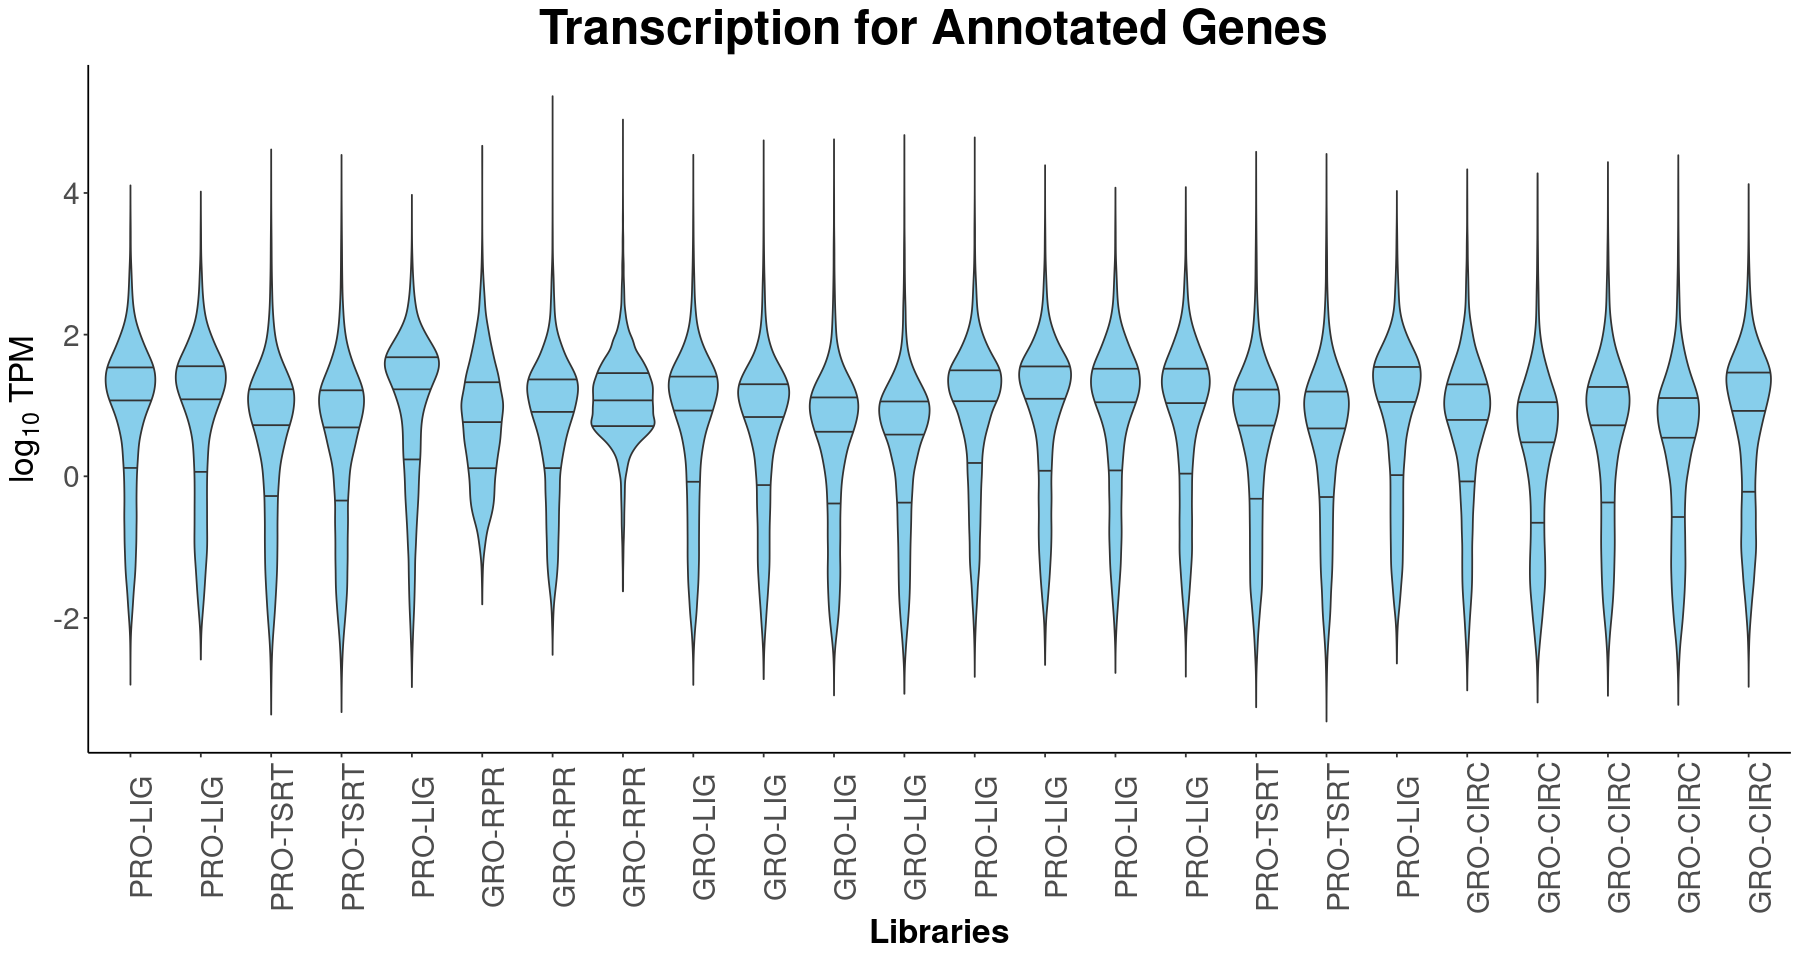

In [17]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(tpm_gather_genes, 
       aes(factor(run_accession), log(tpm, base=10))) + 
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75),
           fill='skyblue') +
labs(x = "Libraries", y = expression(paste(log[10], " TPM", sep="")) ) + 
ggtitle("Transcription for Annotated Genes ") +
theme_classic() +
scale_x_discrete(labels=labs) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 24, face = "bold"), 
      axis.title = element_text(size = 20,face = "bold"), 
      axis.text = element_text(size = 18),
      axis.text.x = element_text(size = 18, angle = 90))

### Metadata for all the samples

In [18]:
metadata_order <- metadata_hct116[order(metadata_hct116$original_names, colnames(tpm_df_genes)),]
metadata_order$ids <- paste0(metadata_order$protocol,"_",metadata_order$library,"_",metadata_order$treatment)
metadata_order

,original_names,cellline,treatment,time,protocol,library,ids
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,Chi_DMSO_S9,HCT116,DMSO,1hr,PRO,LIG,PRO_LIG_DMSO
2,Chi_Nutlin_S10,HCT116,NUTLIN,1hr,PRO,LIG,PRO_LIG_NUTLIN
3,DMSO_1_S1_R1_001,HCT116,DMSO,1hr,PRO,TSRT,PRO_TSRT_DMSO
4,DMSO_2_S2_R1_001,HCT116,DMSO,1hr,PRO,TSRT,PRO_TSRT_DMSO
5,DMSO_HCT116_RPI_26_S1_R1_001,HCT116,DMSO,1hr,PRO,LIG,PRO_LIG_DMSO
6,GRO15_DMSO_062111_042215,HCT116,DMSO,1hr,GRO,RPR,GRO_RPR_DMSO
7,GRO18_DMSO10_062111_042215,HCT116,DMSO,1hr,GRO,RPR,GRO_RPR_DMSO
8,GRO20_DMSO100_062111_042215,HCT116,DMSO,1hr,GRO,RPR,GRO_RPR_DMSO
9,i13_AGTCAA_L008_R1_001,HCT116,DMSO,1hr,GRO,LIG,GRO_LIG_DMSO


In [19]:
colnames(tpm_df_genes) <- metadata_order$ids

# Filtering genes based on counts

In [20]:
##filter rows with all TPM values not 0
rows_without_zero <- apply(tpm_df_genes, 1, function(row) all(row > 0.5 ))
                           
##Subset the rows that fulfill the above criteria
tpm_df_genes_transcribed <- tpm_df_genes[rows_without_zero,]

In [21]:
dim(tpm_df_genes)
dim(tpm_df_genes_transcribed)
colnames(tpm_df_genes_transcribed) <- metadata_order$original_names

[1] 27971    24

[1] 11668    24

In [22]:
##add summaries for counts
tpm_df_genes_transcribed$stdev <- apply(tpm_df_genes_transcribed[c(1:24)], 1 , sd, na.rm=TRUE)
tpm_df_genes_transcribed$variance <- apply(tpm_df_genes_transcribed[c(1:24)], 1 , var, na.rm=TRUE)
tpm_df_genes_transcribed$mean <- apply(tpm_df_genes_transcribed[c(1:24)], 1 , mean, na.rm=TRUE)
tpm_df_genes_transcribed$median <- apply(tpm_df_genes_transcribed[c(1:24)], 1 , median, na.rm=TRUE)
tpm_df_genes_transcribed$coefvar <- apply(tpm_df_genes_transcribed[c(1:24)], 1, cv)

In [23]:
std_plot <- ggplot(tpm_df_genes_transcribed[c(24:29)], aes(log(stdev, base=10))) + 
ggtitle("TPM Standard Deviation") +
ylab('Count') + xlab(expression(paste(log[10], ' Standard Deviation', sep=""))) +
geom_histogram(bins = 45, 
               colour = 'black', 
               fill = 'dodgerblue',
              alpha= 0.75) + 
theme_cowplot(22)


In [24]:
cv_plot <- ggplot(tpm_df_genes_transcribed[c(24:29)], 
                  aes(log(coefvar, base=10))) + 
ggtitle("TPM Coefficient of Variation") +
ylab('Count') + 
xlab(expression(paste(log[10],' Coefficient of Variation', sep=""))) +
geom_histogram(bins = 45, 
               colour = 'black', 
               fill = 'dodgerblue',
              alpha= 0.75) + 
theme_cowplot(22)

In [25]:
tpm_plot <- ggplot(tpm_df_genes_transcribed[c(24:29)], 
                  aes(log(mean, base=10))) + 
ggtitle("Mean TPM Distribution") +
ylab('Count') + 
xlab(expression(paste(log[10],' Average TPM', sep=""))) +
geom_histogram(bins = 45, 
               colour = 'black', 
               fill = 'dodgerblue',
              alpha= 0.75) + 
theme_cowplot(22)


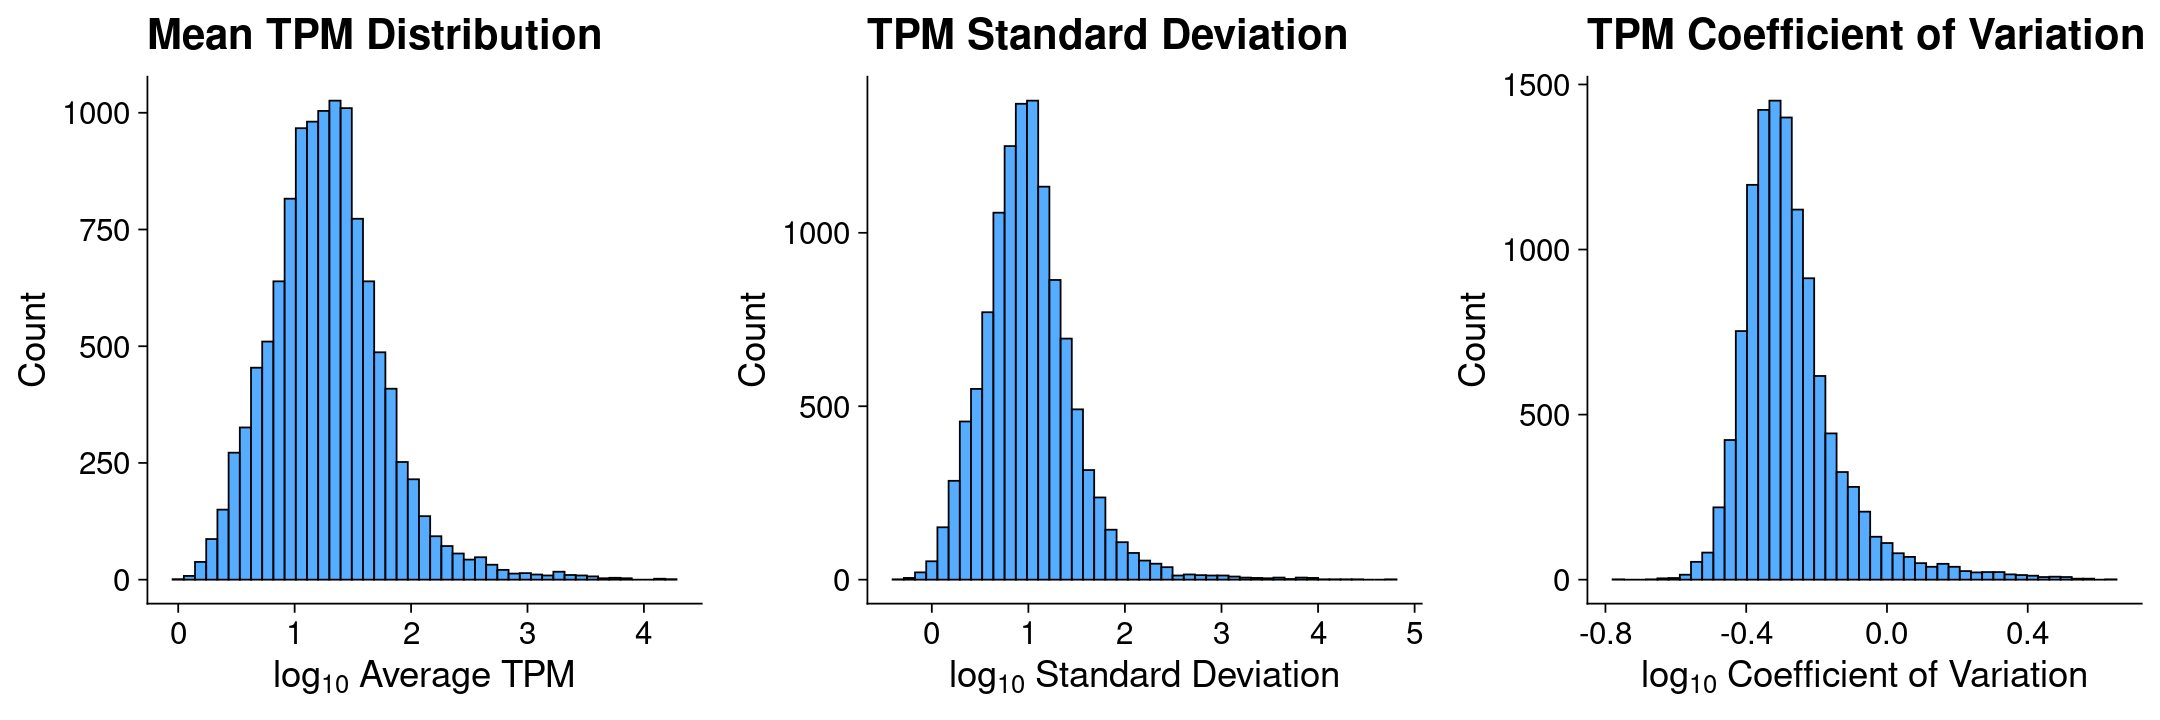

In [26]:
options(repr.plot.width=18, repr.plot.height=6)
cowplot::plot_grid(plotlist = list(tpm_plot,std_plot,cv_plot), nrow = 1, ncol = 3)

In [27]:
sd_tpm_plot <- ggplot(tpm_df_genes_transcribed[c(24:29)],
                      aes(x=log(mean, base=10), y=log(stdev, base=10))) + 
ggtitle("Standard Deviation in Gene Transcription") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], ' Standard Deviation', sep=""))) +
geom_point(color = 'blue', fill = 'dodgerblue',alpha= 0.15) + 
theme_cowplot(22)

In [28]:
cv_tpm_plot <- ggplot(tpm_df_genes_transcribed[c(24:29)],
                      aes(x=log(mean, base=10), y=log(coefvar, base=10))) + 
ggtitle("CV in Gene Transcription") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], 'Coefficient of Variation', sep=""))) +
geom_point(color = 'blue', fill = 'dodgerblue',alpha= 0.15) + 
theme_cowplot(22)

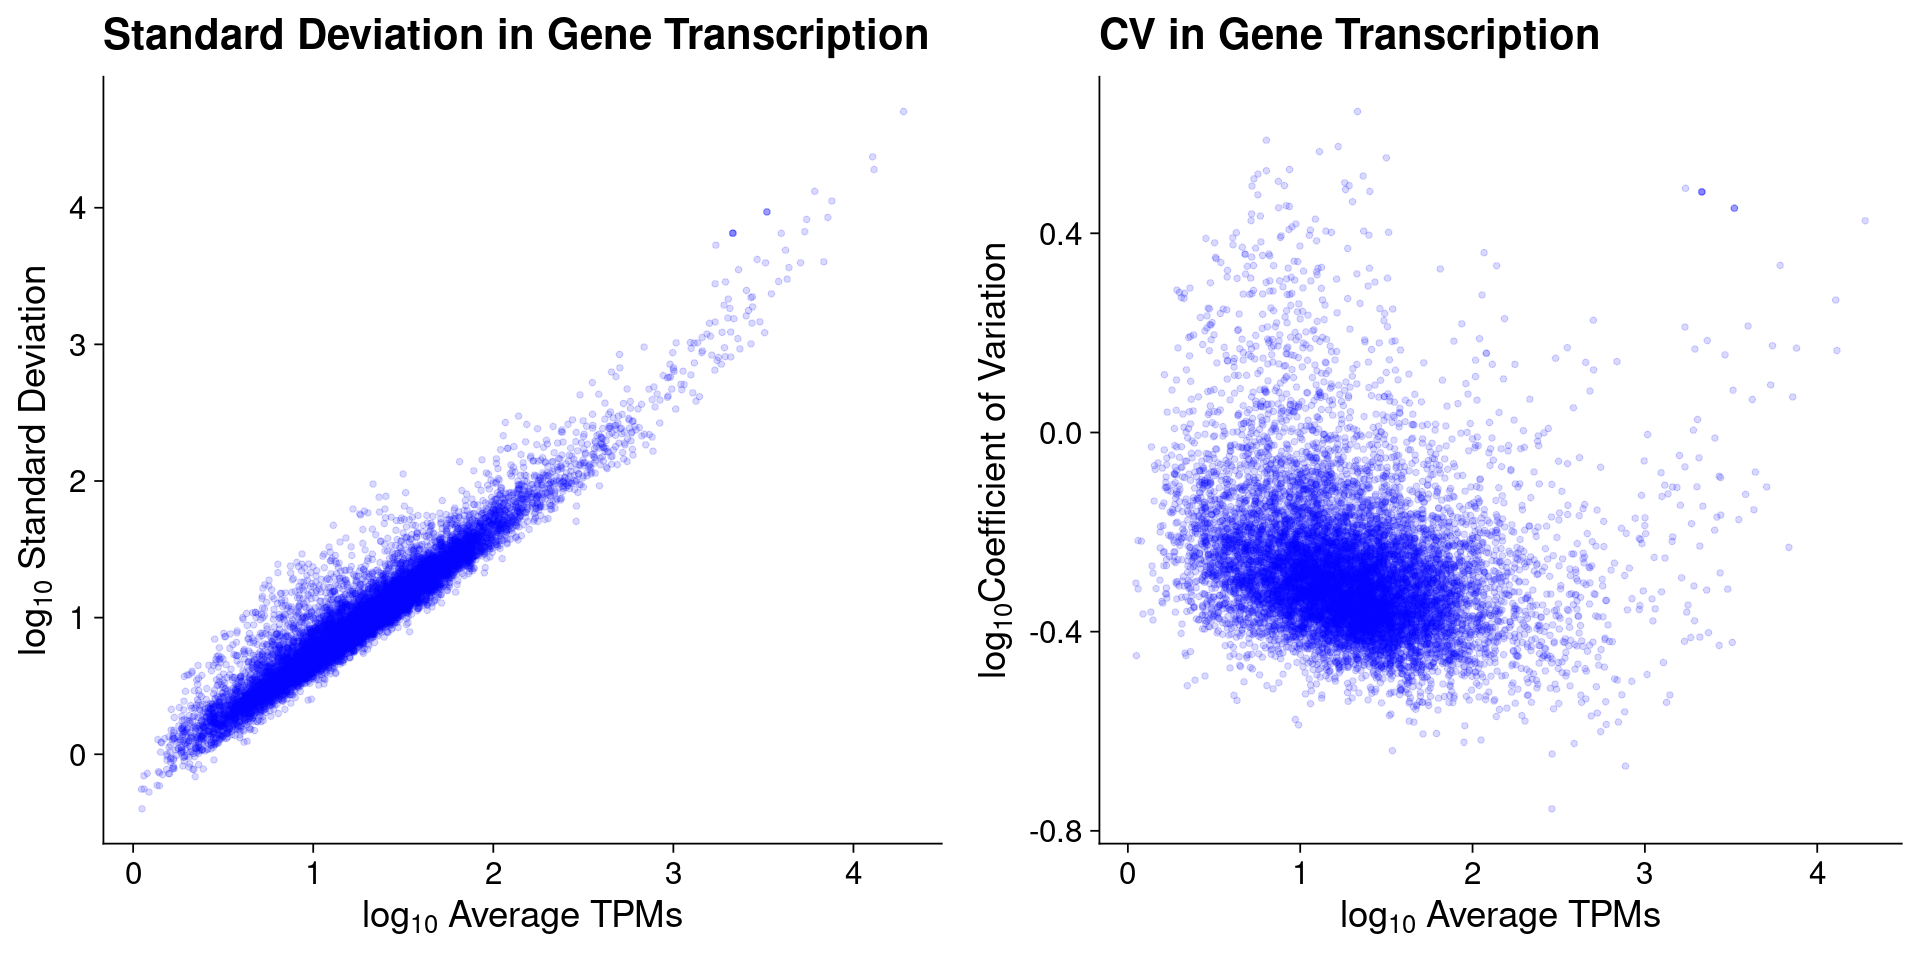

In [29]:
options(repr.plot.width=16, repr.plot.height=8)
cowplot::plot_grid(plotlist = list(sd_tpm_plot,cv_tpm_plot),
                   nrow = 1, ncol = 2)

### CV 0.55 & mean TPM > 150

In [30]:
filtered_genes_cv0.55_tpm150 <- subset(tpm_df_genes_transcribed, coefvar < 0.55 & mean > 150)
dim(filtered_genes_cv0.55_tpm150)
print(rownames(filtered_genes_cv0.55_tpm150))

[1] 294  29

  [1] "OR51B5"         "HMGA2"          "DCBLD2"         "MIR31HG"       
  [5] "KITLG"          "EZR"            "ANXA2"          "ITPRID2"       
  [9] "ALDH1A3"        "RCC1"           "SNHG29"         "SNX5"          
 [13] "NPM1"           "HNRNPF"         "EREG"           "RPS24"         
 [17] "RPS3"           "NEAT1"          "PABPC1"         "NME1-NME2"     
 [21] "SCD"            "ENO1"           "RPL31"          "SENP3-EIF4A1"  
 [25] "SFPQ"           "RPS29"          "FUS"            "SLC38A2"       
 [29] "ERRFI1"         "HNRNPU"         "HSPD1"          "CCND1"         
 [33] "EIF4G2"         "NOLC1"          "RPS19"          "RPL17-C18orf32"
 [37] "THUMPD3-AS1"    "TAF1D"          "ZFAS1"          "EIF5"          
 [41] "HNRNPA2B1"      "SRSF3"          "RPL5"           "RPL34"         
 [45] "AREG"           "HNRNPH1"        "RBM12B"         "SNHG4"         
 [49] "HMGA1"          "EEF2"           "PDP1"           "RABGGTB"       
 [53] "RRM2"           "DDX5"         

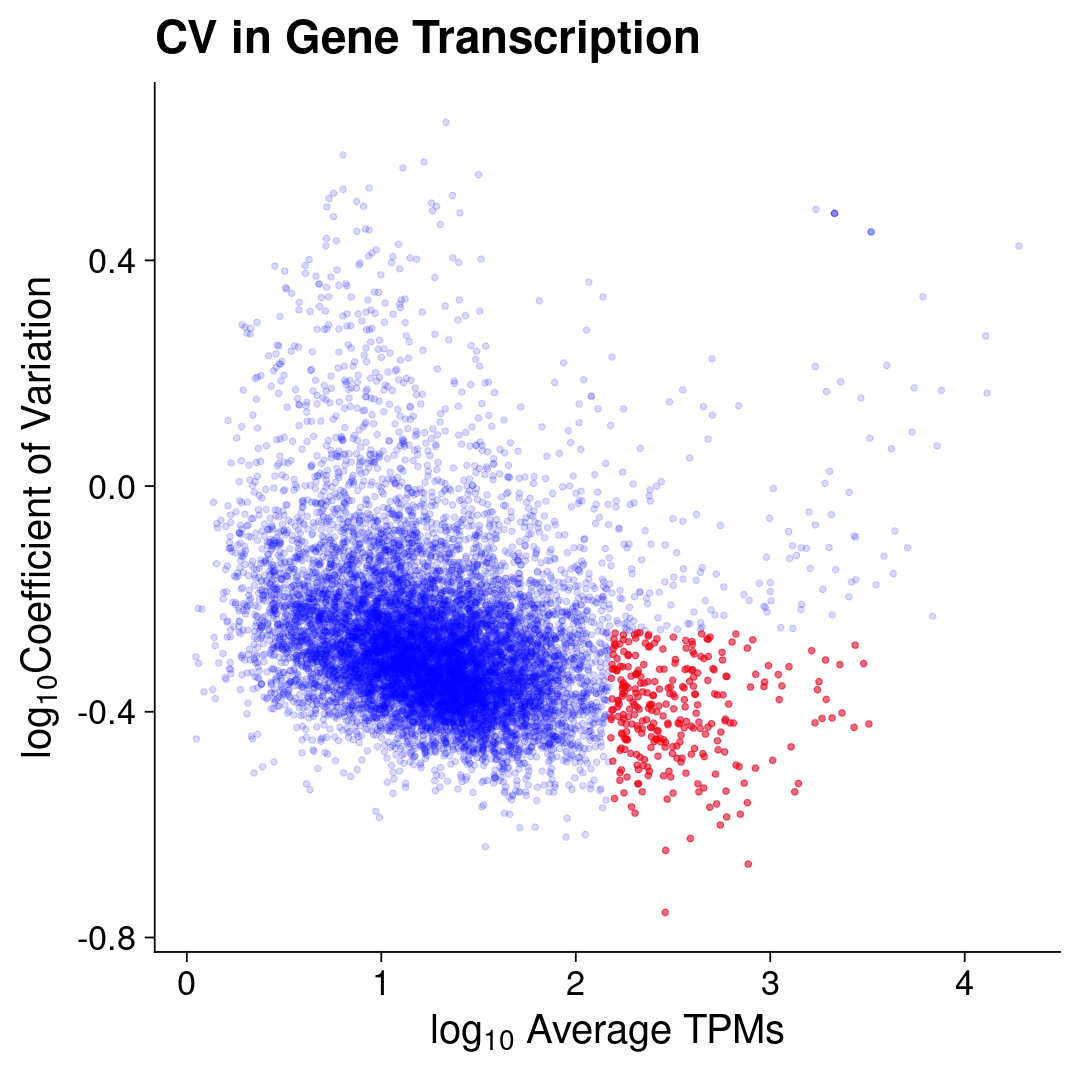

In [31]:
options(repr.plot.width=9, repr.plot.height=9)
ggplot(tpm_df_genes_transcribed[c(24:29)], aes(x=log(mean, base=10), y=log(coefvar, base=10))) + 
ggtitle("CV in Gene Transcription") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], 'Coefficient of Variation', sep=""))) +
geom_point(color = 'blue', fill = 'dodgerblue',alpha= 0.15) + 
geom_point(data=filtered_genes_cv0.55_tpm150[c(24:29)], aes(x=log(mean, base=10), y=log(coefvar, base=10)),
           color = 'red' , fill = 'maroon', alpha=0.5) +
theme_cowplot(24)

### CV 0.85 & mean TPM > 100

In [32]:
filtered_genes_cv0.85_tpm100 <- subset(tpm_df_genes_transcribed, coefvar < 0.85 & mean > 100)
dim(filtered_genes_cv0.85_tpm100)
print(rownames(filtered_genes_cv0.85_tpm100))

[1] 669  29

  [1] "OR51B5"         "HMGA2"          "DCBLD2"         "MIR31HG"       
  [5] "KITLG"          "MTAP"           "HNRNPC"         "MATR3"         
  [9] "EZR"            "ANXA2"          "EIF3A"          "ITPRID2"       
 [13] "RBM39"          "ALDH1A3"        "ANKRD10"        "CAV1"          
 [17] "KPNB1"          "RCC1"           "PKM"            "SNHG29"        
 [21] "RBM14-RBM4"     "RBM4"           "MKI67"          "PCBP2"         
 [25] "SNX5"           "NPM1"           "HNRNPF"         "EREG"          
 [29] "TRA2B"          "CTC1"           "RPS24"          "DDX17"         
 [33] "RPS3"           "NEAT1"          "GPRC5A"         "LDHB"          
 [37] "AMOTL2"         "FASN"           "JPT1"           "PABPC1"        
 [41] "SRRM2"          "NME1-NME2"      "SLC20A1"        "EEF1D"         
 [45] "SCD"            "ENO1"           "P4HB"           "RPL31"         
 [49] "PPRC1"          "SENP3-EIF4A1"   "CALM2"          "SFPQ"          
 [53] "CCT5"           "LRRC59"       

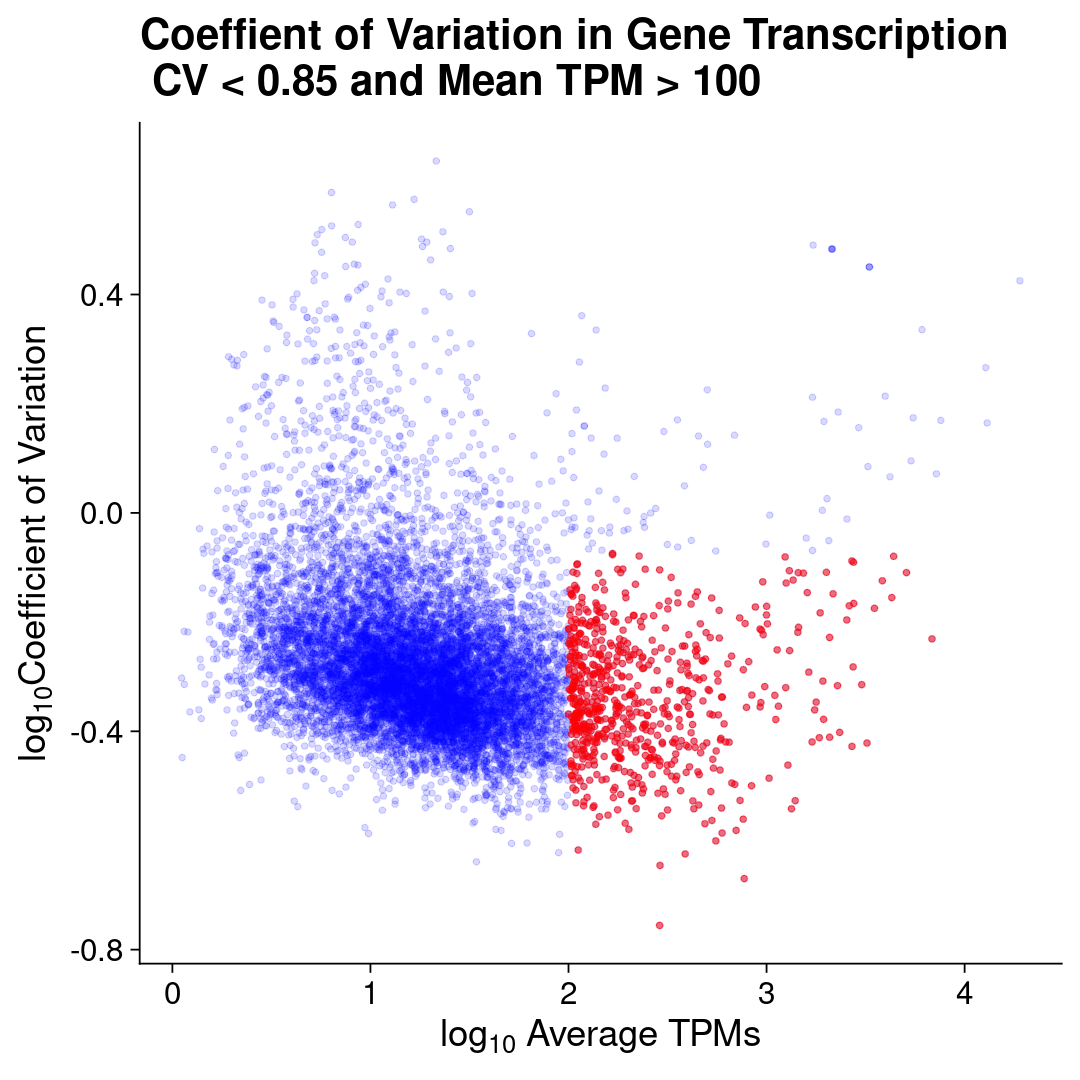

In [33]:
options(repr.plot.width=9, repr.plot.height=9)
ggplot(tpm_df_genes_transcribed[c(24:29)], aes(x=log(mean, base=10), y=log(coefvar, base=10))) + 
ggtitle("Coeffient of Variation in Gene Transcription \n CV < 0.85 and Mean TPM > 100") +
xlab(expression(paste(log[10],' Average TPMs'))) +
ylab(expression(paste(log[10], 'Coefficient of Variation', sep=""))) +
geom_point(color = 'blue', fill = 'dodgerblue',alpha= 0.15) + 
geom_point(data=filtered_genes_cv0.85_tpm100[c(24:29)], aes(x=log(mean, base=10), y=log(coefvar, base=10)),
           color = 'red' , fill = 'maroon', alpha=0.5) +
theme_cowplot(22)

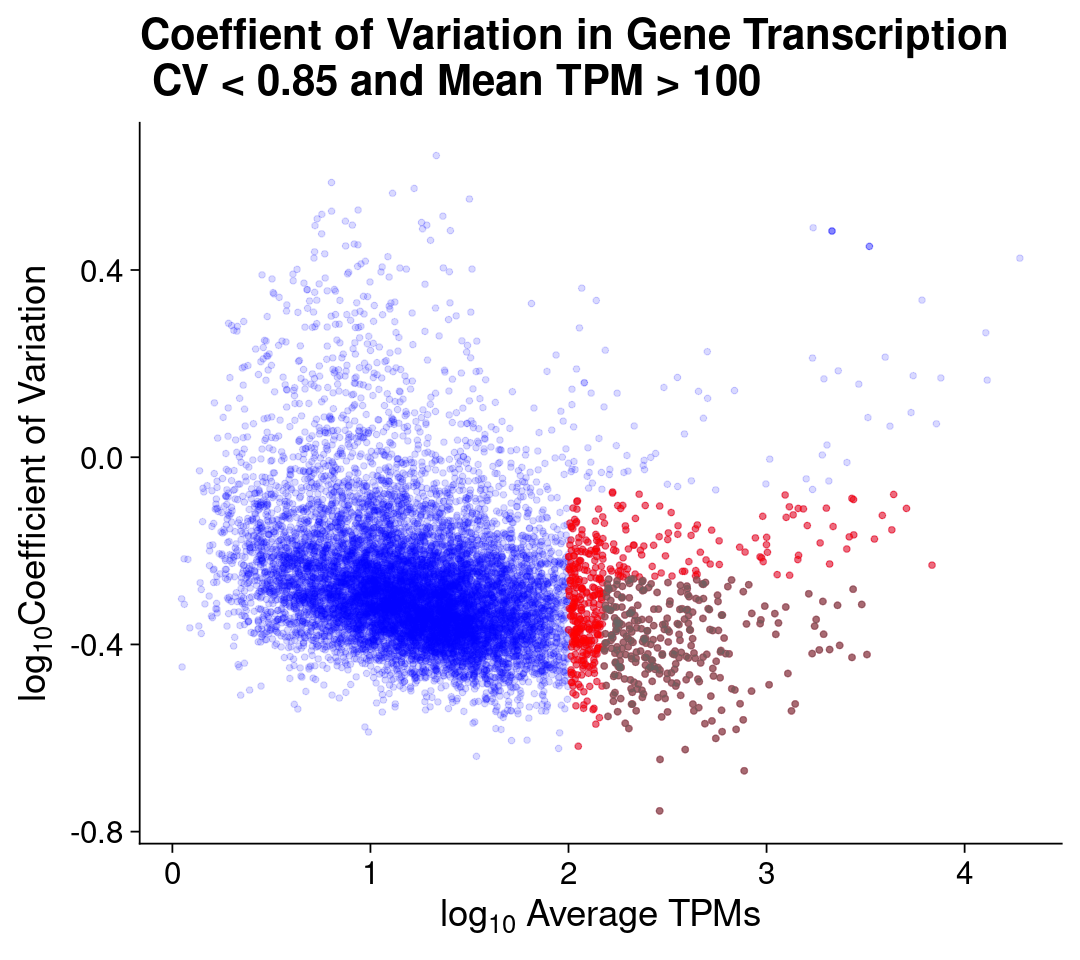

In [34]:
options(repr.plot.width=9, repr.plot.height=8)
ggplot(tpm_df_genes_transcribed[c(24:29)], aes(x=log(mean, base=10), y=log(coefvar, base=10))) + 
ggtitle("Coeffient of Variation in Gene Transcription \n CV < 0.85 and Mean TPM > 100") +
xlab(expression(paste(log[10],' Average TPMs'))) +
ylab(expression(paste(log[10], 'Coefficient of Variation', sep=""))) +
geom_point(color = 'blue', fill = 'dodgerblue',alpha= 0.15) + 
geom_point(data=filtered_genes_cv0.85_tpm100[c(24:29)], 
           aes(x=log(mean, base=10), y=log(coefvar, base=10)),
           color = 'red' , fill = 'maroon', alpha=0.5) +
geom_point(data=filtered_genes_cv0.55_tpm150[c(24:29)], 
           aes(x=log(mean, base=10), y=log(coefvar, base=10)),
           color = 'gray40' , fill = 'gray', alpha=0.5) +
theme_cowplot(22)


In [35]:
write.table(filtered_genes_cv0.55_tpm150,
            file = "../data/filtered_genes_cv0.55_tpm150.txt",
            quote=FALSE,sep='\t')

In [36]:
write.table(filtered_genes_cv0.85_tpm100,
            file = "../data/filtered_genes_cv0.85_tpm100.txt",
            quote=FALSE,sep='\t')

# Session Information

In [37]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] data.table_1.14.0    org.Hs.eg.db_3.10.0  AnnotationDbi_1.48.0
 [4] IRanges_2.20.2       S4Vectors_0.24.4     Biobase_2.46.0      
 [7] BiocGenerics_0.32.0  tidyr_1.1.2          dplyr_1.0.2         
[10] cowplot_1.1.1        ggplot2_3.3.3        docstring_1.0.0     

loaded via a namespace (and not attach